In [40]:
from google.colab import drive
import pandas as pd
import numpy as np
import csv
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from gensim.models import Word2Vec
from gensim.parsing.preprocessing import stem_text, remove_stopwords
import matplotlib.pyplot as plt

from textblob import TextBlob
#import numpy as np
#import matplotlib.pyplot as plt
#import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer 
import re
#import nltk
#nltk.download('stopwords')
#from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
#import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from wordcloud import WordCloud,STOPWORDS
from numpy import nan
from bs4 import BeautifulSoup    
from nltk.stem import WordNetLemmatizer
#from sklearn.feature_extraction.text import CountVectorizer
from math import sqrt
import nltk
nltk.download('wordnet')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True



# Using Google Colab
*Mount to google drive*

In [2]:
drive.mount('/content/gdrive',force_remount=True)
route='/content/gdrive/My Drive/Colab Notebooks/'

Mounted at /content/gdrive


In [3]:
import  sklearn as sk

In [4]:
data=pd.read_csv(route + r"Dataset.tsv",sep='\t')

In [21]:
def makeTxt (uncleanedTxt):
  with open(route + '/unCleaned.txt', 'a') as writefile:
    writefile.write(uncleanedTxt+'\n' )

#function to clean the data
#takes an uncleaned Sentence and return a cleaned Sentence
def review_to_words(raw_review): 
    review =raw_review
    review = re.sub('[^a-zA-Z]', ' ',review)
    review = review.lower()
    #review= review.PorterStemme
    review = review.split()
    lemmatizer = WordNetLemmatizer()

    review = [lemmatizer.lemmatize(w) for w in review if not w in set(stopwords.words('english'))]
    return (' '.join(review))

# DATASET OVERVIEW

In [22]:
data.head(5)
#i=0
for eachsentence in range(len(data['review'])):
  data.review[eachsentence]=stem_text(remove_stopwords(data.review[eachsentence]))
  #i=i+1
 # makeTxt(data.review[eachsentence])
data.head(5)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,id,sentiment,review
0,5814_8,1,"stuff moment mj i'v start listen music, watch ..."
1,2381_9,1,"\the classic war worlds\"" timothi hine enterta..."
2,7759_3,0,film start manag (nichola bell) welcom investo...
3,3630_4,0,assum prai film (\the greatest film opera ever...
4,9495_8,1,superbl trashi wondrou unpretenti 80' exploita...


By default it will split into 75% training and 25% test data.

In [23]:

from sklearn.model_selection import train_test_split
x_train, x_test,y_train, y_test=train_test_split(data,data['sentiment'],test_size=0.25)

In [24]:
print(x_test)

            id  sentiment                                             review
19169   7824_1          0  saw movi night want like it. expect movi heard...
11705    774_8          1  think nice movie; think romanian movi sceneri ...
12493    36_10          1  anoth good stoog short!christin mcintyr love e...
5659    313_10          1  black american love soap opera. watch dub span...
8121   10890_2          0  thought movi pretti lame. you'r look cheesey, ...
...        ...        ...                                                ...
6307   12212_3          0  offen over-the-top action adventure,first bloo...
912      716_1          0  thi movi worst movi seen. absolut storyline, g...
1248    1659_7          1  fragment life femal painter achiev histor reno...
7426    3607_8          1  flip digit subscrib channel night coupl year a...
21419   6732_4          0  discov movi ifc, thought interesting. \tiny\" ...

[6250 rows x 3 columns]


# TEST DATA INFO
**Characteristics of Testing Data**

In [25]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6250 entries, 19169 to 21419
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         6250 non-null   object
 1   sentiment  6250 non-null   int64 
 2   review     6250 non-null   object
dtypes: int64(1), object(2)
memory usage: 195.3+ KB


In [26]:
print(x_train)

            id  sentiment                                             review
2812    3558_3          0  base rai russell' dark bestseller, john (watch...
1773    9833_8          1  terrorist attempt steal secret biolog weapon, ...
13194   2776_8          1  thi film famou qualities: liter script, partly...
14214  10372_3          0  enjoi reviewer' comment far film saw second-ru...
3185   6713_10          1  like tv it' thing girl sixteenth birthdai witc...
...        ...        ...                                                ...
321      418_4          0  wish idea good \invi man\" work better careful...
9389    9697_3          0  i'v seen dwarf-movi littl fun watch it. famou ...
15300   9341_7          1  sandler amaz again... sandler fan. thi movi sa...
10280  12037_1          0  thi seri worst seen. terribl acting, terribl e...
430    11769_1          0  somebodi ow ang lee apology. actually, lot peo...

[18750 rows x 3 columns]


# TRAIN DATA INFO
**Characteristics OF Training Data**

In [27]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18750 entries, 2812 to 430
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         18750 non-null  object
 1   sentiment  18750 non-null  int64 
 2   review     18750 non-null  object
dtypes: int64(1), object(2)
memory usage: 585.9+ KB


# Sentiment Polarity
**To assign polarity on the basis of its sentiment value**
<br/>
*For training data*

In [28]:
Sentiment_Polarity=[]
for row in x_train['sentiment']:
    if row ==0:
        Sentiment_Polarity.append('Negative')
    elif row == 1:
        Sentiment_Polarity.append('Positive')
    else:
        Sentiment_Polarity.append('Failed')
x_train['Sentiment_Polarity'] = Sentiment_Polarity


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [29]:
x_train.head(5)

,id,sentiment,review,Sentiment_Polarity
2812,3558_3,0,"base rai russell' dark bestseller, john (watch...",Negative
1773,9833_8,1,"terrorist attempt steal secret biolog weapon, ...",Positive
13194,2776_8,1,"thi film famou qualities: liter script, partly...",Positive
14214,10372_3,0,enjoi reviewer' comment far film saw second-ru...,Negative
3185,6713_10,1,like tv it' thing girl sixteenth birthdai witc...,Positive


In [30]:
word_count=pd.value_counts(x_train['Sentiment_Polarity'].values, sort=False)
word_count

Negative    9386
Positive    9364
dtype: int64

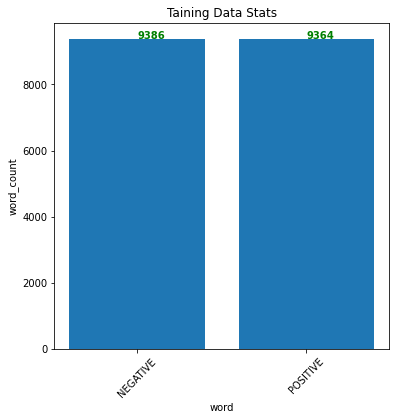

In [118]:
Index = [1,2]
fig = plt.figure(figsize=(6,6))
plt.bar(Index,word_count,color = 'blue')
plt.xticks(Index,['NEGATIVE','POSITIVE'],rotation=46)
plt.ylabel('word_count')
plt.xlabel('word')
plt.title('Taining Data Stats')
plt.bar(Index, word_count)
for a,b in zip(Index, word_count):
    plt.text(a, b, str(b) ,color='green', fontweight='bold')


# Sentiment Polarity
**To assign polarity on the basis of its sentiment value**
<br/>
*For testing data*


In [32]:
Sentiment_Polarity_test=[]
for row in x_test['sentiment']:
    if row ==0:
        Sentiment_Polarity_test.append('Negative')
    elif row == 1:
        Sentiment_Polarity_test.append('Positive')
    else:
        Sentiment_Polarity_test.append('Failed')
x_test['Sentiment_Polarity_test'] = Sentiment_Polarity_test

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [33]:
word_count_test=pd.value_counts(x_test['Sentiment_Polarity_test'].values, sort=False)
word_count_test

Positive    3136
Negative    3114
dtype: int64

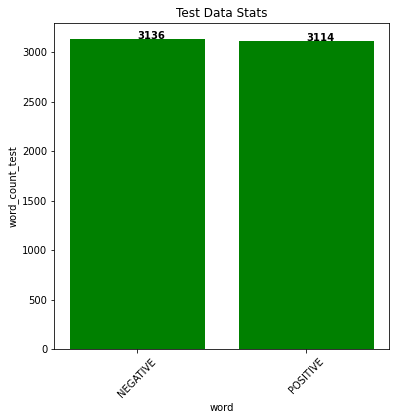

In [119]:
Index1 = [1,2]
fig = plt.figure(figsize=(6,6))
barList=plt.bar(Index1,word_count_test, color='green')
#barList[0].set_color('yellow')
plt.xticks(Index1,['NEGATIVE','POSITIVE'],rotation=46)
plt.ylabel('word_count_test')
plt.xlabel('word')
plt.title('Test Data Stats')
#plt.bar(Index1, word_count_test)
for c,d in zip(Index1, word_count_test):
    plt.text(c, d, str(d) ,color='black', fontweight='bold')
#plt.show()

In [35]:
x_train['review']

2812     base rai russell' dark bestseller, john (watch...
1773     terrorist attempt steal secret biolog weapon, ...
13194    thi film famou qualities: liter script, partly...
14214    enjoi reviewer' comment far film saw second-ru...
3185     like tv it' thing girl sixteenth birthdai witc...
                               ...                        
321      wish idea good \invi man\" work better careful...
9389     i'v seen dwarf-movi littl fun watch it. famou ...
15300    sandler amaz again... sandler fan. thi movi sa...
10280    thi seri worst seen. terribl acting, terribl e...
430      somebodi ow ang lee apology. actually, lot peo...
Name: review, Length: 18750, dtype: object

In [41]:
corpus= [] #takes longer time 
for eachReview in x_train['review']:
    corpus.append(review_to_words(eachReview))

In [49]:
corpus[0]


'base rai russell dark bestseller john watcher wood hough direct bust littl br br though lack gori violence lack narr sensibl character br br incubus titl demon endow mammoth peni shoot red sperm vagina intercour precise rape br br john cassavetes moonlight success direct career convinc doctor question circumst bizarr attack young woman br br horrif possibl victim spawn demon offspr consid audience toler slow garbage br br script reluct explor dramat repercuss fertil premi exemplifi major problem vapid big schlong loo exercise'

In [50]:
positive=x_train[x_train['sentiment']==1]
negative=x_train[x_train['sentiment']==0]

words = ' '.join(positive['review'])
split_word = " ".join([word for word in words.split()])



In [51]:
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='white',
                      width=3500,
                      height=2500
                     ).generate(split_word)


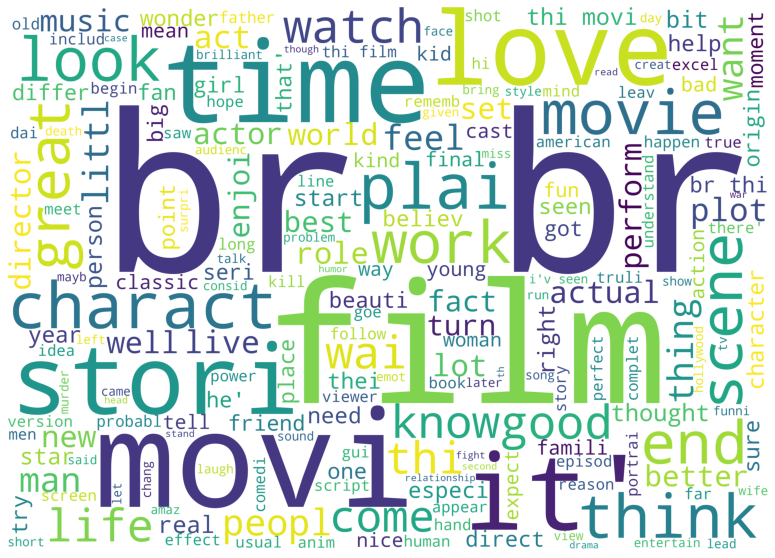

In [120]:

plt.figure(1,figsize=(25, 10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [55]:
#takes longer time
neg_words = ' '.join(negative['review'])
neg_split_word = " ".join([word for word in words.split()])
'''
neg_wordcloud = WordCloud(stopwords="br",
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(neg_split_word)
'''
neg_wordcloud = WordCloud(background_color="black", 
                          max_words=2000,
                          stopwords=STOPWORDS,
                          max_font_size=256,
                          random_state=42,
                          width=3000, height=2500).generate(neg_split_word)
#wc.generate(article.text)


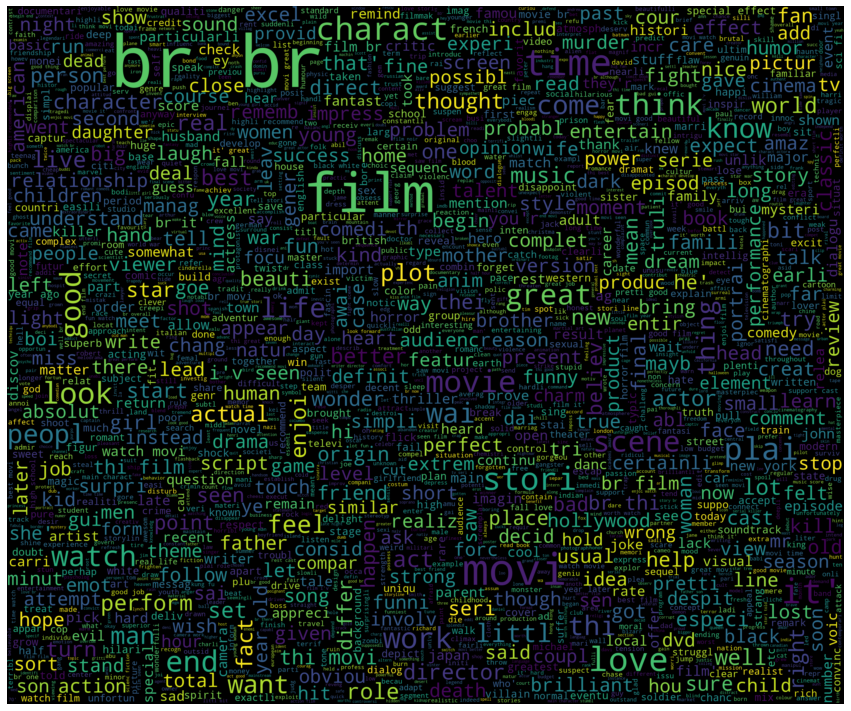

In [54]:

plt.figure(1,figsize=(15, 15))
plt.imshow(neg_wordcloud,interpolation="bilinear")
plt.axis('off')
plt.show()

# SENTIMENT CLASSIFIER using the **NAIVE BAYES** classifier and **BAG OF WORDS** model.

In [56]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer




In [57]:
vectorizer_tfidf_review = TfidfVectorizer(min_df=10,max_features=5000,ngram_range=(1,2)) #df is cut off for value which appaers in less than 10 rev

vectorizer_tfidf_review.fit(x_train['review'])


text_tfidf_train = vectorizer_tfidf_review.transform(x_train['review']) #self produsced df
text_tfidf_test = vectorizer_tfidf_review.transform(x_test['review'])


print("Shape of matrix after tfidf_text_train ",text_tfidf_train.shape)


print("Shape of matrix after tfidf_text_test ",text_tfidf_test.shape)



Shape of matrix after tfidf_text_train  (18750, 5000)
Shape of matrix after tfidf_text_test  (6250, 5000)


In [58]:
vectorizer= CountVectorizer(min_df=10,max_features=5000)
vectorizer.fit(x_train['review'])

x_train_bow=vectorizer.transform(x_train['review'])
x_test_bow=vectorizer.transform(x_test['review'])
print("After Vectorization")
print(x_train_bow.shape)
print(x_test_bow.shape)

After Vectorization
(18750, 5000)
(6250, 5000)




**Accuracy based on Raw Counts**

In [59]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_auc_score
from sklearn import metrics 
from tqdm import tqdm
import matplotlib.pyplot as plt
 
train_auc=[]

#alpha=[0.0001,0.001,0.01,0.1,1,10,100,1000]

neigh=MultinomialNB()
neigh.fit(x_train_bow, y_train.values)
y_train_pred=neigh.predict(x_test_bow)
  #train_auc.append(roc_auc_score(y_train,y_train_pred))
print("Accuracy based on Raw Counts")
accRAW = metrics.accuracy_score(y_train_pred, y_test) *100 
print( accRAW  )

Accuracy based on Raw Counts
83.664


**Accuracy based on TF-IDF**

In [60]:
train_auc=[]

neigh=MultinomialNB()
neigh.fit(text_tfidf_train, y_train.values)
y_train_pred=neigh.predict(text_tfidf_test)
print("Accuracy based on TF-IDF")
accTFidf= metrics.accuracy_score(y_train_pred, y_test) *100
print(accTFidf)

Accuracy based on TF-IDF
84.672


# SENTIMENT CLASSIFIER using **TEXTBLOB** Library

In [61]:
sen = review_to_words("With all this stuff going down at the moment with MJ i've started listening to his music, watching the odd documentary here and there, watched The Wiz and watched Moonwalker again. Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent. Moonwalker is part biography, part feature film which i remember going to see at the cinema when it was originally released. Some of it has subtle messages about MJ's feeling towards the press and also the obvious message of drugs are bad m'kay.<br /><br />Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyway then you are going to hate this and find it boring. Some may call MJ an egotist for consenting to the making of this movie BUT MJ and most of his fans would say that he made it for the fans which if true is really nice of him.<br /><br />The actual feature film bit when it finally starts is only on for 20 minutes or so excluding the Smooth Criminal sequence and Joe Pesci is convincing as a psychopathic all powerful drug lord. Why he wants MJ dead so bad is beyond me. Because MJ overheard his plans? Nah, Joe Pesci's character ranted that he wanted people to know it is he who is supplying drugs etc so i dunno, maybe he just hates MJ's music.<br /><br />Lots of cool things in this like MJ turning into a car and a robot and the whole Speed Demon sequence. Also, the director must have had the patience of a saint when it came to filming the kiddy Bad sequence as usually directors hate working with one kid let alone a whole bunch of them performing a complex dance scene.<br /><br />Bottom line, this movie is for people who like MJ on one level or another (which i think is most people). If not, then stay away. It does try and give off a wholesome message and ironically MJ's bestest buddy in this movie is a girl! Michael Jackson is truly one of the most talented people ever to grace this planet but is he guilty? Well, with all the attention i've gave this subject....hmmm well i don't know because people can be different behind closed doors, i know this for a fact. He is either an extremely nice but stupid guy or one of the most sickest liars. I hope he is not the latter.")
print(sen)

stuff going moment mj started listening music watching odd documentary watched wiz watched moonwalker maybe want get certain insight guy thought really cool eighty maybe make mind whether guilty innocent moonwalker part biography part feature film remember going see cinema originally released subtle message mj feeling towards press also obvious message drug bad kay br br visually impressive course michael jackson unless remotely like mj anyway going hate find boring may call mj egotist consenting making movie mj fan would say made fan true really nice br br actual feature film bit finally start minute excluding smooth criminal sequence joe pesci convincing psychopathic powerful drug lord want mj dead bad beyond mj overheard plan nah joe pesci character ranted wanted people know supplying drug etc dunno maybe hate mj music br br lot cool thing like mj turning car robot whole speed demon sequence also director must patience saint came filming kiddy bad sequence usually director hate work

In [62]:
#for eachsentence in range(len(data['review'])):
#  data.review[eachsentence]=stem_text(remove_stopwords(data.review[eachsentence]))

#F1 = "The food at restaurant was really good"
F1 = "The food at restaurant was pathetic."
F2 = "With all this stuff going down at the moment with MJ i've started listening to his music, watching the odd documentary here and there, watched The Wiz and watched Moonwalker again. Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent. Moonwalker is part biography, part feature film which i remember going to see at the cinema when it was originally released. Some of it has subtle messages about MJ's feeling towards the press and also the obvious message of drugs are bad m'kay.<br /><br />Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyway then you are going to hate this and find it boring. Some may call MJ an egotist for consenting to the making of this movie BUT MJ and most of his fans would say that he made it for the fans which if true is really nice of him.<br /><br />The actual feature film bit when it finally starts is only on for 20 minutes or so excluding the Smooth Criminal sequence and Joe Pesci is convincing as a psychopathic all powerful drug lord. Why he wants MJ dead so bad is beyond me. Because MJ overheard his plans? Nah, Joe Pesci's character ranted that he wanted people to know it is he who is supplying drugs etc so i dunno, maybe he just hates MJ's music.<br /><br />Lots of cool things in this like MJ turning into a car and a robot and the whole Speed Demon sequence. Also, the director must have had the patience of a saint when it came to filming the kiddy Bad sequence as usually directors hate working with one kid let alone a whole bunch of them performing a complex dance scene.<br /><br />Bottom line, this movie is for people who like MJ on one level or another (which i think is most people). If not, then stay away. It does try and give off a wholesome message and ironically MJ's bestest buddy in this movie is a girl! Michael Jackson is truly one of the most talented people ever to grace this planet but is he guilty? Well, with all the attention i've gave this subject....hmmm well i don't know because people can be different behind closed doors, i know this for a fact. He is either an extremely nice but stupid guy or one of the most sickest liars. I hope he is not the latter."
labels_Blob=[]
for eachReview in data.review:
  blob= TextBlob(eachReview)
  if blob.sentiment.polarity>0: #THRESHOLD
    labels_Blob.append(1)
  else:
    labels_Blob.append(0)

'''print(data.review[2])
F3= data.review[2]
blob1= TextBlob(F1)
blob2= TextBlob(F2)
blob3= TextBlob(F3)
print (blob1.sentiment)
print (blob2.sentiment)
print (blob3.sentiment)'''


'print(data.review[2])\nF3= data.review[2]\nblob1= TextBlob(F1)\nblob2= TextBlob(F2)\nblob3= TextBlob(F3)\nprint (blob1.sentiment)\nprint (blob2.sentiment)\nprint (blob3.sentiment)'

In [63]:
labels_Blob_df = pd.DataFrame(data=labels_Blob, columns= ['labels'])
NegPos=[]
for eachLabel in labels_Blob_df.labels:
  if eachLabel == 1:
    NegPos.append('Positive')
  else:
    NegPos.append('Negative')
    
labels_Blob_df['sentiment']=NegPos
labels_Blob_df

,labels,sentiment
0,0,Negative
1,1,Positive
2,1,Positive
3,1,Positive
4,0,Negative
...,...,...
24995,0,Negative
24996,1,Positive
24997,0,Negative
24998,1,Positive


In [64]:
word_count_tb=pd.value_counts(labels_Blob_df['sentiment'].values, sort=False)
word_count_tb

Negative     7437
Positive    17563
dtype: int64

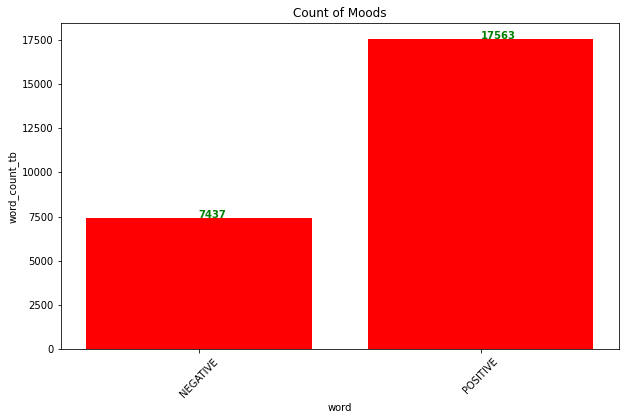

In [65]:
Index3 = [1,2]
plt.figure(figsize=(10,6))
barList1=plt.bar(Index3,word_count_tb, color = 'r')
#barList1[0].set_color('blue')

plt.xticks(Index3,['NEGATIVE','POSITIVE'],rotation=46)
plt.ylabel('word_count_tb')
plt.xlabel('word')
plt.title('Count of Moods')
#plt.bar(Index3, word_count_tb)
for e,f in zip(Index3, word_count_tb):
    plt.text(e, f, str(f) ,color='green', fontweight='bold')


**Accuracy using TEXTBLOB library**

In [66]:
correct= 0
for i in range(len(labels_Blob)):
  if labels_Blob[i] == data.sentiment[i]:
    correct+=1
    

In [91]:
accTB = (correct/len(labels_Blob) * 100)
print(accTB)
accTB= round(accTB,3)
#accTB

68.04400000000001




# Sentiment Analysis using **NEURAL NETWORK**

In [68]:
import numpy
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers.embeddings import Embedding
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer

In [69]:
tokenizer= Tokenizer(num_words=500)
tokenizer.fit_on_texts(x_train.review)

X_train = tokenizer.texts_to_sequences(x_train.review)
X_test = tokenizer.texts_to_sequences(x_test.review)

In [70]:
max_review_length = 500
X_train = sequence.pad_sequences(X_train, maxlen=max_review_length)
X_test = sequence.pad_sequences(X_test, maxlen=max_review_length)

In [71]:
x_train['review']

2812     base rai russell' dark bestseller, john (watch...
1773     terrorist attempt steal secret biolog weapon, ...
13194    thi film famou qualities: liter script, partly...
14214    enjoi reviewer' comment far film saw second-ru...
3185     like tv it' thing girl sixteenth birthdai witc...
                               ...                        
321      wish idea good \invi man\" work better careful...
9389     i'v seen dwarf-movi littl fun watch it. famou ...
15300    sandler amaz again... sandler fan. thi movi sa...
10280    thi seri worst seen. terribl acting, terribl e...
430      somebodi ow ang lee apology. actually, lot peo...
Name: review, Length: 18750, dtype: object

In [97]:

# create the model
embedding_vecor_length = 32
model = Sequential()
model.add(Embedding(500, embedding_vecor_length, input_length=max_review_length))
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
#model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
#model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(100))
#model.add(LSTM(16))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())
history=model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=8, batch_size=256)
# Final evaluation of the model
#history = model.fit(X_train, y_train, epochs=34, batch_size=1, validation_data=(X_val, y_val))

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 500, 32)           16000     
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 500, 32)           3104      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 250, 32)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               53200     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 72,405
Trainable params: 72,405
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/8
74/74 [==============================] - 5s 45ms/step - loss: 0.6626 - accuracy: 0.5689 - val_loss: 0

**Acuray of NN**

In [108]:

scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 83.09%


In [109]:
predictions = model.predict(X_test)

In [110]:
labelPredictions = []
for eachPrediction in predictions:
  if eachPrediction > 0.5:
    labelPredictions.append(1)
  else:
    labelPredictions.append(0)


In [111]:
labels_NN_df = pd.DataFrame(data=labelPredictions, columns= ['labels'])
NegPos=[]
for eachLabel in labels_NN_df.labels:
  if eachLabel == 1:
    NegPos.append('Positive')
  else:
    NegPos.append('Negative')
    
labels_NN_df['sentiment']=NegPos
labels_NN_df

,labels,sentiment
0,1,Positive
1,1,Positive
2,1,Positive
3,1,Positive
4,0,Negative
...,...,...
6245,1,Positive
6246,0,Negative
6247,1,Positive
6248,0,Negative


In [112]:
word_count_NN=pd.value_counts(labels_NN_df['sentiment'].values, sort=False)
word_count_NN

Positive    3335
Negative    2915
dtype: int64

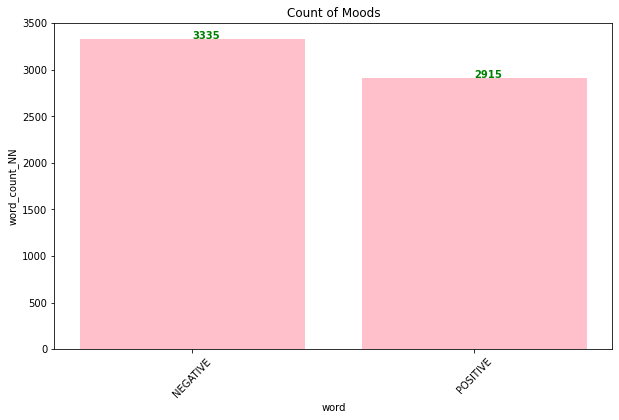

In [113]:
Index4 = [1,2]
fig =plt.figure(figsize=(10,6))
barList2=plt.bar(Index4,word_count_NN, color = 'pink')
#barList1[0].set_color('blue')

plt.xticks(Index4,['NEGATIVE','POSITIVE'],rotation=46)
plt.ylabel('word_count_NN')
plt.xlabel('word')
plt.title('Count of Moods')
#plt.bar(Index3, word_count_tb)
for g,h in zip(Index4, word_count_NN):
    plt.text(g, h, str(h) ,color='green', fontweight='bold')


In [114]:
accNN = scores[1]*100
print("Accuracy of Neural Network Model")
print(accNN)
accNN=round(accNN,3)
#accNN


Accuracy of Neural Network Model
83.08799862861633


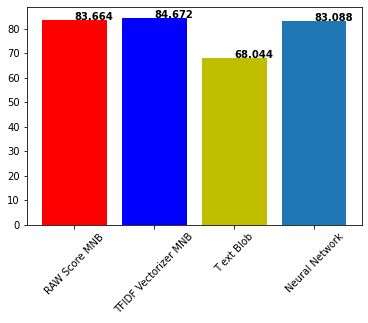

In [115]:
comparison=plt.bar([1,2,3,4], [accRAW,accTFidf,accTB,accNN])

#fig = plt.figure(figsize=(10,6))
plt.xticks([1,2,3,4],['RAW Score MNB','TFIDF Vectorizer MNB', 'T ext Blob', 'Neural Network'],rotation=46)
comparison[0].set_color('r')
comparison[1].set_color('b')
comparison[2].set_color('g')
comparison[2].set_color('y')

for a,b in zip([1,2,3,4], [accRAW,accTFidf,accTB,accNN]):
    plt.text(a, b, str(b) ,color='Black', fontweight='bold')
plt.show()